In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms

data_dir = '/content/drive/MyDrive/programs/data'  # Replace with the actual path to your data directory

# Define the transformations for the data
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load the datasets with ImageFolder
image_datasets = {
    x: datasets.ImageFolder(
        root=data_dir + '/' + x,
        transform=data_transforms[x]
    )
    for x in ['train', 'test']
}

# Create the data loaders
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x],
        batch_size=32,
        shuffle=True,
        num_workers=4
    )
    for x in ['train', 'test']
}


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# define DenseNet-121 architecture
model = models.densenet121(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, 2)  # Assuming 2 classes (benign and malignant)
# defining loss function and optimizer:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 169MB/s] 


In [ ]:
# training the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 10)

    # Training phase
    model.train()
    running_loss = 0.0

    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average training loss
    train_loss = running_loss / len(dataloaders['train'])

    # Evaluation phase
    model.eval()
    correct_predictions = 0

    with torch.no_grad():
            for inputs, labels in dataloaders['test']:
              inputs = inputs.to(device)
              labels = labels.to(device)

              outputs = model(inputs)
              _, predicted = torch.max(outputs, 1)
              correct_predictions += (predicted == labels).sum().item()

    # Calculate accuracy on the test set
    accuracy = correct_predictions / len(dataloaders['test'].dataset)

    # Print the training loss and test accuracy for each epoch
    print(f"Training Loss: {train_loss:.4f}   Test Accuracy: {accuracy:.4f}")

Epoch 1/10
----------
Training Loss: 0.4287   Test Accuracy: 0.8288
Epoch 2/10
----------
Training Loss: 0.3284   Test Accuracy: 0.8303
Epoch 3/10
----------
Training Loss: 0.2819   Test Accuracy: 0.8758
Epoch 4/10
----------
Training Loss: 0.2780   Test Accuracy: 0.8485
Epoch 5/10
----------
Training Loss: 0.2451   Test Accuracy: 0.8894
Epoch 6/10
----------
Training Loss: 0.2253   Test Accuracy: 0.8894
Epoch 7/10
----------
Training Loss: 0.2255   Test Accuracy: 0.8848
Epoch 8/10
----------
Training Loss: 0.2101   Test Accuracy: 0.9015
Epoch 9/10
----------
Training Loss: 0.1952   Test Accuracy: 0.8924
Epoch 10/10
----------
Training Loss: 0.1726   Test Accuracy: 0.9030


In [ ]:
print(accuracy)

0.9030303030303031


In [ ]:
#ResNet-152

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet152

# Load the pre-trained ResNet-152 model
model_resnet = resnet152(pretrained=True)

# Modify the last fully connected layer to match the number of classes in your problem
num_features = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_features, 2)  # Assuming 2 classes (benign and malignant)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_resnet.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:05<00:00, 43.1MB/s]


In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = 0.0
    correct_predictions = 0

    model_resnet.train()
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model_resnet(inputs)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(dataloaders['train'].dataset)
    train_accuracy = correct_predictions / len(dataloaders['train'].dataset)

    # Evaluation loop
    test_loss = 0.0
    correct_predictions = 0

    model_resnet.eval()
    with torch.no_grad():
        for inputs, labels in dataloaders['test']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model_resnet(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            test_loss += loss.item()

    test_loss /= len(dataloaders['test'].dataset)
    test_accuracy = correct_predictions / len(dataloaders['test'].dataset)

    # Print epoch statistics
    print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {train_accuracy:.4f} - "
          f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10 - Training Loss: 0.0133 - Training Accuracy: 0.7877 - Test Loss: 0.0089 - Test Accuracy: 0.8682
Epoch 2/10 - Training Loss: 0.0096 - Training Accuracy: 0.8648 - Test Loss: 0.0080 - Test Accuracy: 0.8818
Epoch 3/10 - Training Loss: 0.0087 - Training Accuracy: 0.8810 - Test Loss: 0.0079 - Test Accuracy: 0.8712
Epoch 4/10 - Training Loss: 0.0081 - Training Accuracy: 0.8818 - Test Loss: 0.0083 - Test Accuracy: 0.8712
Epoch 5/10 - Training Loss: 0.0071 - Training Accuracy: 0.9006 - Test Loss: 0.0078 - Test Accuracy: 0.8758
Epoch 6/10 - Training Loss: 0.0068 - Training Accuracy: 0.9067 - Test Loss: 0.0079 - Test Accuracy: 0.8985
Epoch 7/10 - Training Loss: 0.0054 - Training Accuracy: 0.9271 - Test Loss: 0.0077 - Test Accuracy: 0.8985
Epoch 8/10 - Training Loss: 0.0053 - Training Accuracy: 0.9339 - Test Loss: 0.0080 - Test Accuracy: 0.8970
Epoch 9/10 - Training Loss: 0.0050 - Training Accuracy: 0.9305 - Test Loss: 0.0078 - Test Accuracy: 0.8955
Epoch 10/10 - Training Loss: 0.0045 -

In [ ]:
# DenseNet201

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import densenet201

# Load the pre-trained DenseNet-201 model
model_densenet = densenet201(pretrained=True)

# Modify the last fully connected layer to match the number of classes in your problem
num_features = model_densenet.classifier.in_features
model_densenet.classifier = nn.Linear(num_features, 2)  # Replace num_classes with the number of classes in your problem

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_densenet.parameters(), lr=0.001, momentum=0.9)

# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_densenet = model_densenet.to(device)


In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = 0.0
    correct_predictions = 0

    model_densenet.train()
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model_densenet(inputs)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(dataloaders['train'].dataset)
    train_accuracy = correct_predictions / len(dataloaders['train'].dataset)

    # Evaluation loop
    test_loss = 0.0
    correct_predictions = 0

    model_densenet.eval()
    with torch.no_grad():
        for inputs, labels in dataloaders['test']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model_densenet(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            test_loss += loss.item()

    test_loss /= len(dataloaders['test'].dataset)
    test_accuracy = correct_predictions / len(dataloaders['test'].dataset)

    # Print epoch statistics
    print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {train_accuracy:.4f} - "
          f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10 - Training Loss: 0.0136 - Training Accuracy: 0.7922 - Test Loss: 0.0102 - Test Accuracy: 0.8561
Epoch 2/10 - Training Loss: 0.0100 - Training Accuracy: 0.8527 - Test Loss: 0.0089 - Test Accuracy: 0.8682
Epoch 3/10 - Training Loss: 0.0085 - Training Accuracy: 0.8716 - Test Loss: 0.0087 - Test Accuracy: 0.8682
Epoch 4/10 - Training Loss: 0.0084 - Training Accuracy: 0.8825 - Test Loss: 0.0079 - Test Accuracy: 0.8803
Epoch 5/10 - Training Loss: 0.0069 - Training Accuracy: 0.9037 - Test Loss: 0.0076 - Test Accuracy: 0.8894
Epoch 6/10 - Training Loss: 0.0065 - Training Accuracy: 0.9090 - Test Loss: 0.0078 - Test Accuracy: 0.8970
Epoch 7/10 - Training Loss: 0.0058 - Training Accuracy: 0.9210 - Test Loss: 0.0077 - Test Accuracy: 0.8970
Epoch 8/10 - Training Loss: 0.0052 - Training Accuracy: 0.9316 - Test Loss: 0.0074 - Test Accuracy: 0.8970
Epoch 9/10 - Training Loss: 0.0049 - Training Accuracy: 0.9324 - Test Loss: 0.0089 - Test Accuracy: 0.8894
Epoch 10/10 - Training Loss: 0.0050 -

In [ ]:
##Efficient-B6

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b6

# Load the pre-trained EfficientNet-B6 model
model_efficientnet = efficientnet_b6(pretrained=True)

# Modify the last fully connected layer to match the number of classes in your problem
num_features = model_efficientnet.classifier[1].in_features
model_efficientnet._fc = nn.Linear(num_features, 2)  # Replace num_classes with the number of classes in your problem

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_efficientnet.parameters(), lr=0.001, momentum=0.9)

# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_efficientnet = model_efficientnet.to(device)

In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = 0.0
    correct_predictions = 0

    model_efficientnet.train()
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model_efficientnet(inputs)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(dataloaders['train'].dataset)
    train_accuracy = correct_predictions / len(dataloaders['train'].dataset)

    # Evaluation loop
    test_loss = 0.0
    correct_predictions = 0

    model_efficientnet.eval()
    with torch.no_grad():
        for inputs, labels in dataloaders['test']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model_efficientnet(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            test_loss += loss.item()

    test_loss /= len(dataloaders['test'].dataset)
    test_accuracy = correct_predictions / len(dataloaders['test'].dataset)

    # Print epoch statistics
    print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {train_accuracy:.4f} - "
          f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10 - Training Loss: 0.1991 - Training Accuracy: 0.0740 - Test Loss: 0.1689 - Test Accuracy: 0.0545
Epoch 2/10 - Training Loss: 0.0753 - Training Accuracy: 0.6808 - Test Loss: 0.0348 - Test Accuracy: 0.7515
Epoch 3/10 - Training Loss: 0.0323 - Training Accuracy: 0.8141 - Test Loss: 0.0183 - Test Accuracy: 0.7939
Epoch 4/10 - Training Loss: 0.0178 - Training Accuracy: 0.8349 - Test Loss: 0.0132 - Test Accuracy: 0.8455
Epoch 5/10 - Training Loss: 0.0143 - Training Accuracy: 0.8326 - Test Loss: 0.0116 - Test Accuracy: 0.8333
Epoch 6/10 - Training Loss: 0.0127 - Training Accuracy: 0.8330 - Test Loss: 0.0113 - Test Accuracy: 0.8530
Epoch 7/10 - Training Loss: 0.0117 - Training Accuracy: 0.8459 - Test Loss: 0.0106 - Test Accuracy: 0.8576
Epoch 8/10 - Training Loss: 0.0111 - Training Accuracy: 0.8549 - Test Loss: 0.0105 - Test Accuracy: 0.8591
Epoch 9/10 - Training Loss: 0.0103 - Training Accuracy: 0.8557 - Test Loss: 0.0101 - Test Accuracy: 0.8576
Epoch 10/10 - Training Loss: 0.0102 -

In [ ]:
##VGG19

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import vgg19

# Load the pre-trained VGG-19 model
model_vgg = vgg19(pretrained=True)

# Modify the last fully connected layer to match the number of classes in your problem
num_features = model_vgg.classifier[-1].in_features
num_classes = 2  # Replace with the number of classes in your problem
model_vgg.classifier[-1] = nn.Linear(num_features, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_vgg.parameters(), lr=0.001, momentum=0.9)

# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_vgg = model_vgg.to(device)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = 0.0
    correct_predictions = 0

    model_vgg.train()
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model_vgg(inputs)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(dataloaders['train'].dataset)
    train_accuracy = correct_predictions / len(dataloaders['train'].dataset)

    # Evaluation loop
    test_loss = 0.0
    correct_predictions = 0

    model_vgg.eval()
    with torch.no_grad():
        for inputs, labels in dataloaders['test']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model_vgg(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            test_loss += loss.item()

    test_loss /= len(dataloaders['test'].dataset)
    test_accuracy = correct_predictions / len(dataloaders['test'].dataset)

    # Print epoch statistics
    print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {train_accuracy:.4f} - "
          f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:11<00:00, 52.2MB/s]


Epoch 1/10 - Training Loss: 0.0137 - Training Accuracy: 0.7828 - Test Loss: 0.0110 - Test Accuracy: 0.8364
Epoch 2/10 - Training Loss: 0.0114 - Training Accuracy: 0.8258 - Test Loss: 0.0101 - Test Accuracy: 0.8409
Epoch 3/10 - Training Loss: 0.0101 - Training Accuracy: 0.8474 - Test Loss: 0.0096 - Test Accuracy: 0.8712
Epoch 4/10 - Training Loss: 0.0095 - Training Accuracy: 0.8632 - Test Loss: 0.0093 - Test Accuracy: 0.8561
Epoch 5/10 - Training Loss: 0.0088 - Training Accuracy: 0.8772 - Test Loss: 0.0107 - Test Accuracy: 0.8242
Epoch 6/10 - Training Loss: 0.0087 - Training Accuracy: 0.8734 - Test Loss: 0.0089 - Test Accuracy: 0.8652
Epoch 7/10 - Training Loss: 0.0086 - Training Accuracy: 0.8738 - Test Loss: 0.0084 - Test Accuracy: 0.8606
Epoch 8/10 - Training Loss: 0.0088 - Training Accuracy: 0.8689 - Test Loss: 0.0087 - Test Accuracy: 0.8636
Epoch 9/10 - Training Loss: 0.0080 - Training Accuracy: 0.8806 - Test Loss: 0.0080 - Test Accuracy: 0.8879
Epoch 10/10 - Training Loss: 0.0078 -

In [ ]:
##Increase Accuracy of DenseNet-121

Epoch 1/10
----------
Training Loss: 0.4456   Test Accuracy: 0.8333
Epoch 2/10
----------
Training Loss: 0.3216   Test Accuracy: 0.8833
Epoch 3/10
----------
Training Loss: 0.3016   Test Accuracy: 0.8742
Epoch 4/10
----------
Training Loss: 0.2529   Test Accuracy: 0.8712
Epoch 5/10
----------
Training Loss: 0.2441   Test Accuracy: 0.8712
Epoch 6/10
----------
Training Loss: 0.2180   Test Accuracy: 0.8727
Epoch 7/10
----------
Training Loss: 0.2253   Test Accuracy: 0.8818
Epoch 8/10
----------
Training Loss: 0.2109   Test Accuracy: 0.8758
Epoch 9/10
----------
Training Loss: 0.2011   Test Accuracy: 0.8939
Epoch 10/10
----------
Training Loss: 0.1748   Test Accuracy: 0.9045


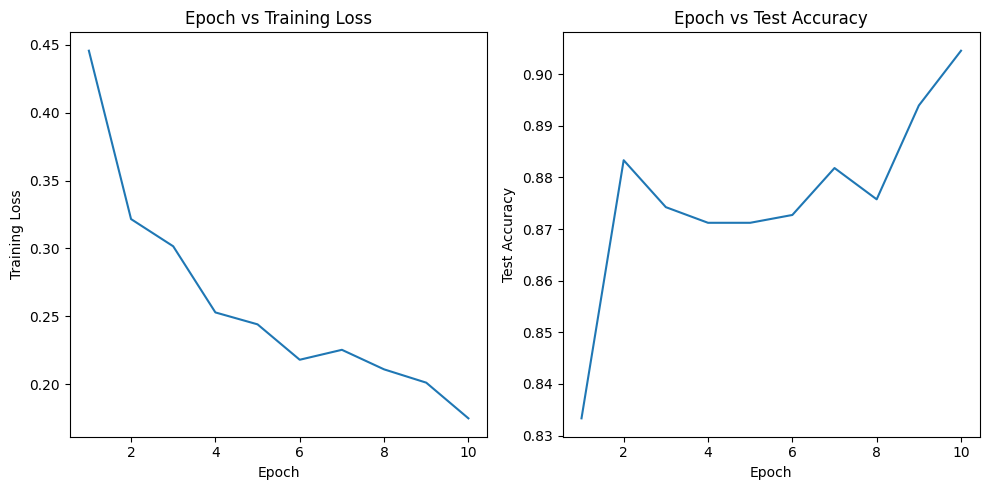

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

# Define DenseNet-121 architecture
model = models.densenet121(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, 2)  # Assuming 2 classes (benign and malignant)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 10  # Adjust as needed
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 10)

    # Training phase
    model.train()
    running_loss = 0.0

    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average training loss
    train_loss = running_loss / len(dataloaders['train'])
    train_losses.append(train_loss)

    # Evaluation phase
    model.eval()
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in dataloaders['test']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

    # Calculate accuracy on the test set
    accuracy = correct_predictions / len(dataloaders['test'].dataset)
    test_accuracies.append(accuracy)

    # Print the training loss and test accuracy for each epoch
    print(f"Training Loss: {train_loss:.4f}   Test Accuracy: {accuracy:.4f}")

# Plot epoch vs accuracy and epoch vs loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Epoch vs Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Epoch vs Test Accuracy')

plt.tight_layout()
plt.show()